Types of GD 

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random

In [4]:
df = pd.read_csv('./homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
df_new = df[['area','bedrooms','price']]
scalerx = MinMaxScaler()
scalery= MinMaxScaler()

scaled_x = scalerx.fit_transform(df_new[['area','bedrooms']])
scaled_y = scalery.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_x


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

Batch GD runs GD over the entire batch to find the weight and bias

In [6]:
w = np.ones((1,2))
w

array([[1., 1.]])

In [7]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [9]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,7],[2,5,6]])
a-b ,'\n' ,np.square(a-b)

(array([[ 0,  0, -4],
        [ 2,  0,  0]]),
 '\n',
 array([[ 0,  0, 16],
        [ 4,  0,  0]]))

In [10]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

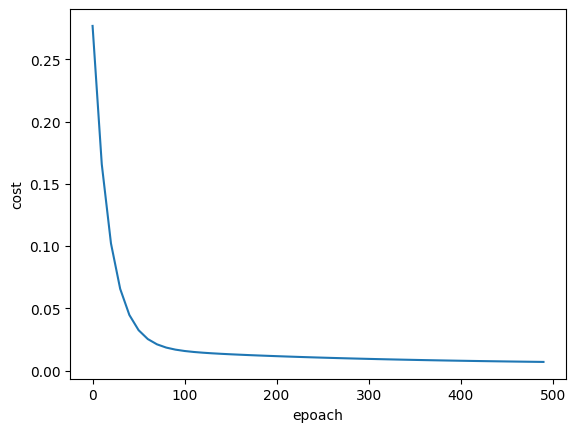

In [11]:
plt.xlabel('epoach')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [19]:
def pred(area,bedroom):
    scaled_test_x = scalerx.transform([[area,bedroom]])
    ans = np.dot(w,scaled_test_x.T) + b
    return scalery.inverse_transform([ans])

In [21]:
pred(2600,4)

c:\Users\arghya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

# Sochastic Gradient Decent

In [31]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70731172, 0.67299821]), -0.2287471150794749, 0.00024891788003472253)

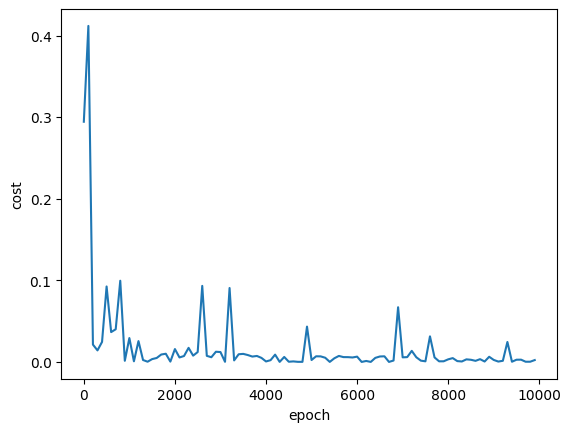

In [33]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)